<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n20.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.795623,79.676967,0.000020,148.472610,148.472528,0.000083
1,0.0,1.0,98.630828,50.598018,0.000340,159.229186,159.228960,0.000226
2,0.0,2.0,97.238784,60.873271,-0.000346,168.111709,168.112125,-0.000416
3,0.0,3.0,93.270619,55.074271,-0.000116,158.344775,158.344978,-0.000203
4,0.0,4.0,52.992691,56.318683,-0.000166,119.311208,119.311397,-0.000188
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.253157,56.438129,0.000284,127.691571,127.691348,0.000223
59996,999.0,56.0,57.689978,55.593625,-0.000523,123.283081,123.283660,-0.000580
59997,999.0,57.0,62.061678,93.590459,-0.000089,165.652047,165.652080,-0.000033
59998,999.0,58.0,81.505564,40.094288,-0.000542,131.599310,131.600011,-0.000701


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.795623,79.676967,0.000020,148.472610,148.472528,0.000083
1,0.0,1.0,98.630828,50.598018,0.000340,159.229186,159.228960,0.000226
2,0.0,2.0,97.238784,60.873271,-0.000346,168.111709,168.112125,-0.000416
3,0.0,3.0,93.270619,55.074271,-0.000116,158.344775,158.344978,-0.000203
4,0.0,4.0,52.992691,56.318683,-0.000166,119.311208,119.311397,-0.000188
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.253157,56.438129,0.000284,127.691571,127.691348,0.000223
59996,999.0,56.0,57.689978,55.593625,-0.000523,123.283081,123.283660,-0.000580
59997,999.0,57.0,62.061678,93.590459,-0.000089,165.652047,165.652080,-0.000033
59998,999.0,58.0,81.505564,40.094288,-0.000542,131.599310,131.600011,-0.000701


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.795623  79.676967  0.000020  148.472610  148.472528  0.000083
      1.0    98.630828  50.598018  0.000340  159.229186  159.228960  0.000226
      2.0    97.238784  60.873271 -0.000346  168.111709  168.112125 -0.000416
      3.0    93.270619  55.074271 -0.000116  158.344775  158.344978 -0.000203
      4.0    52.992691  56.318683 -0.000166  119.311208  119.311397 -0.000188
...                ...        ...       ...         ...         ...       ...
999.0 55.0   61.253157  56.438129  0.000284  127.691571  127.691348  0.000223
      56.0   57.689978  55.593625 -0.000523  123.283081  123.283660 -0.000580
      57.0   62.061678  93.590459 -0.000089  165.652047  165.652080 -0.000033
      58.0   81.505564  40.094288 -0.000542  131.599310  131.600011 -0.000701
      59.0   66.363070  66.215735  0.000307  142.579112  142.578846  0.000266

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.795623  79.676967  0.000020  148.472610  148.472528  0.000083
      1.0    98.630828  50.598018  0.000340  159.229186  159.228960  0.000226
      2.0    97.238784  60.873271 -0.000346  168.111709  168.112125 -0.000416
      3.0    93.270619  55.074271 -0.000116  158.344775  158.344978 -0.000203
      4.0    52.992691  56.318683 -0.000166  119.311208  119.311397 -0.000188
...                ...        ...       ...         ...         ...       ...
999.0 55.0   61.253157  56.438129  0.000284  127.691571  127.691348  0.000223
      56.0   57.689978  55.593625 -0.000523  123.283081  123.283660 -0.000580
      57.0   62.061678  93.590459 -0.000089  165.652047  165.652080 -0.000033
      58.0   81.505564  40.094288 -0.000542  131.599310  131.600011 -0.000701
      59.0   66.363070  66.215735  0.000307  142.579112  142.578846  0.000266

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.795623,79.676967,0.000020,148.472610,148.472528,0.000083
1,0.0,1.0,98.630828,50.598018,0.000340,159.229186,159.228960,0.000226
2,0.0,2.0,97.238784,60.873271,-0.000346,168.111709,168.112125,-0.000416
3,0.0,3.0,93.270619,55.074271,-0.000116,158.344775,158.344978,-0.000203
4,0.0,4.0,52.992691,56.318683,-0.000166,119.311208,119.311397,-0.000188
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.253157,56.438129,0.000284,127.691571,127.691348,0.000223
59996,999.0,56.0,57.689978,55.593625,-0.000523,123.283081,123.283660,-0.000580
59997,999.0,57.0,62.061678,93.590459,-0.000089,165.652047,165.652080,-0.000033
59998,999.0,58.0,81.505564,40.094288,-0.000542,131.599310,131.600011,-0.000701


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.795623  79.676967  0.000020  148.472610  148.472528  0.000083
      1.0    98.630828  50.598018  0.000340  159.229186  159.228960  0.000226
      2.0    97.238784  60.873271 -0.000346  168.111709  168.112125 -0.000416
      3.0    93.270619  55.074271 -0.000116  158.344775  158.344978 -0.000203
      4.0    52.992691  56.318683 -0.000166  119.311208  119.311397 -0.000188
...                ...        ...       ...         ...         ...       ...
999.0 55.0   61.253157  56.438129  0.000284  127.691571  127.691348  0.000223
      56.0   57.689978  55.593625 -0.000523  123.283081  123.283660 -0.000580
      57.0   62.061678  93.590459 -0.000089  165.652047  165.652080 -0.000033
      58.0   81.505564  40.094288 -0.000542  131.599310  131.600011 -0.000701
      59.0   66.363070  66.215735  0.000307  142.579112  142.578846  0.000266

[60000 rows x 6 columns]

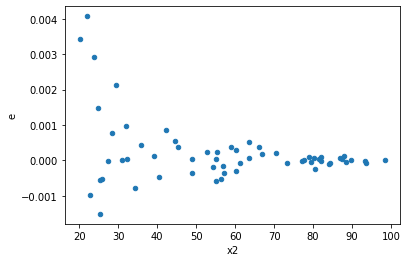

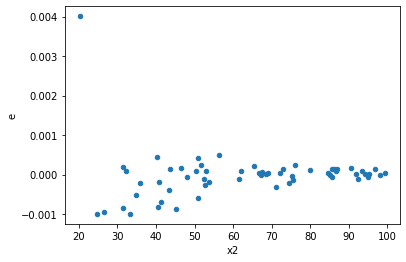

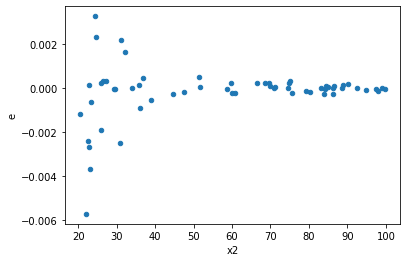

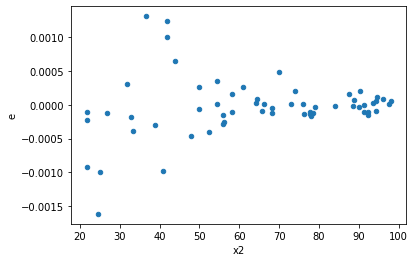

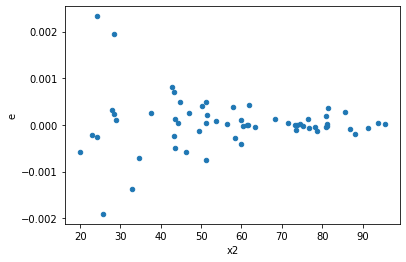

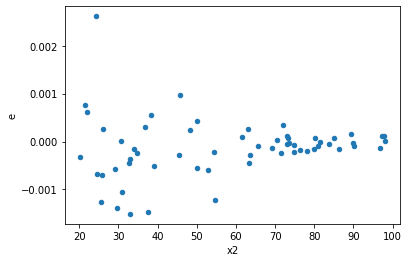

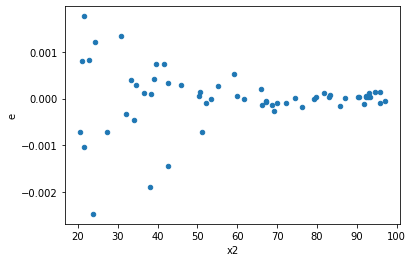

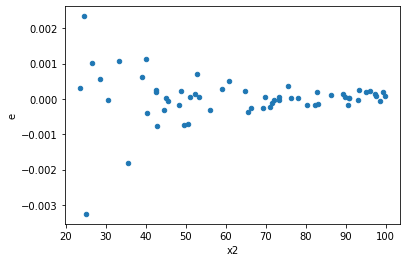

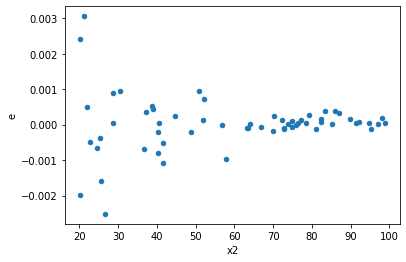

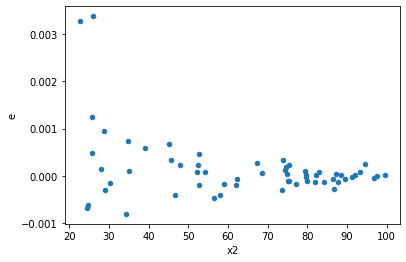

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
615.0,22.0,22.0,3.5366772748884265e-06,4.957175405518299e-06,1.6075805794947394e-07,2.2532615479628632e-07,1.401647654061024,0.4347524065491535,0.7826237967254233,0.21737620327457674,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,1.4097341330589274e-05,1.2292554002877812e-06,6.407882422995124e-07,5.5875245467626414e-08,0.08719767589229521,2.9097693968190556e-07,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,2.2976399354096116e-05,8.165057483434371e-07,1.0443817888225506e-06,3.711389765197441e-08,0.035536714685361466,3.984901718084022e-11,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,1.8567153313242906e-05,3.3422632578962025e-06,8.439615142383139e-07,1.519210571771001e-07,0.18000946087477793,0.00016428221385521012,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,2.1986044461489167e-05,1.0378559341023774e-06,9.993656573404168e-07,4.7175269731926246e-08,0.0472052140129294,7.227455830830091e-10,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,5.164785814922016e-06,9.998336214723249e-07,2.3476299158736437e-07,4.5446982794196585e-08,0.19358665727891786,0.00029112393718264655,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,1.000879237838534e-05,6.277586645961786e-07,4.5494510810842453e-07,2.8534484754371753e-08,0.062720720029308,1.2253797047396903e-08,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,1.0930260500404393e-05,1.2129197997429686e-06,4.968300227456542e-07,5.5132718170134936e-08,0.1109689745910533,2.675134519555594e-06,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,5.1814320784844314e-06,7.132348893611773e-07,2.3551963993111052e-07,3.2419767698235335e-08,0.13765207737120402,1.7808244024691858e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,1.0594077786578867e-05,5.746675738816318e-07,4.815489902990394e-07,2.612125335825599e-08,0.05424422828097891,2.9141117967975787e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    964
Reject005=1 : Homoscedasticity       36
Name: Result_test, dtype: int64